In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import data
data1 = pd.read_csv('Amazon Customer Behavior Survey.csv')

In [3]:
# Remove missing values
data = data1.dropna()

initial_row_count = len(data)

# Deleting rows where 'Age' is less than 18
deleted_rows = data[data['age'] < 18]
data = data[data['age'] >= 18]

# Counting rows after deletion
final_row_count = len(data)

# Counting the number of rows deleted
rows_deleted = initial_row_count - final_row_count

print(f"Rows deleted: {rows_deleted}")


Rows deleted: 13


In [9]:
data = data[data['age'] >= 18]

data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Purchase_Frequency_Num,Age_Group
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,0.50,18-30
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,0.25,18-30
2,2023/06/04 5:04:56 PM GMT+5:30,24,Neutral,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,0.50,18-30
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,0.25,18-30
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,0.00,18-30


In [5]:
# Normalize data

# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Purchase_Frequency_Num'] = data['Purchase_Frequency'].apply(map_purchase_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Purchase_Frequency_Num'] = scaler.fit_transform(data[['Purchase_Frequency_Num']])

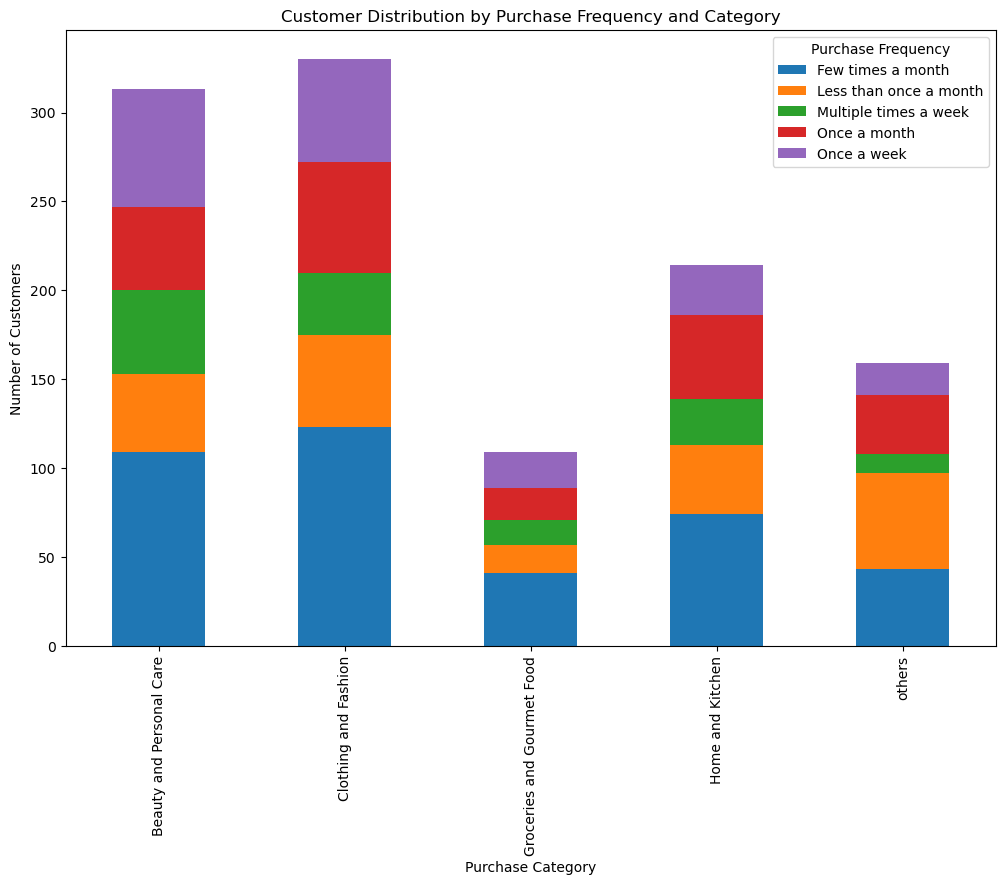

In [6]:
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Step 2: Group by 'Split_Category' and 'Purchase_Frequency' and count the number of customers
category_freq_count = data_split.groupby(['Split_Category', 'Purchase_Frequency']).size().unstack(fill_value=0)

# Step 3: Visualize the Data
category_freq_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Purchase Category')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Purchase Frequency and Category')
plt.legend(title='Purchase Frequency')
plt.show()

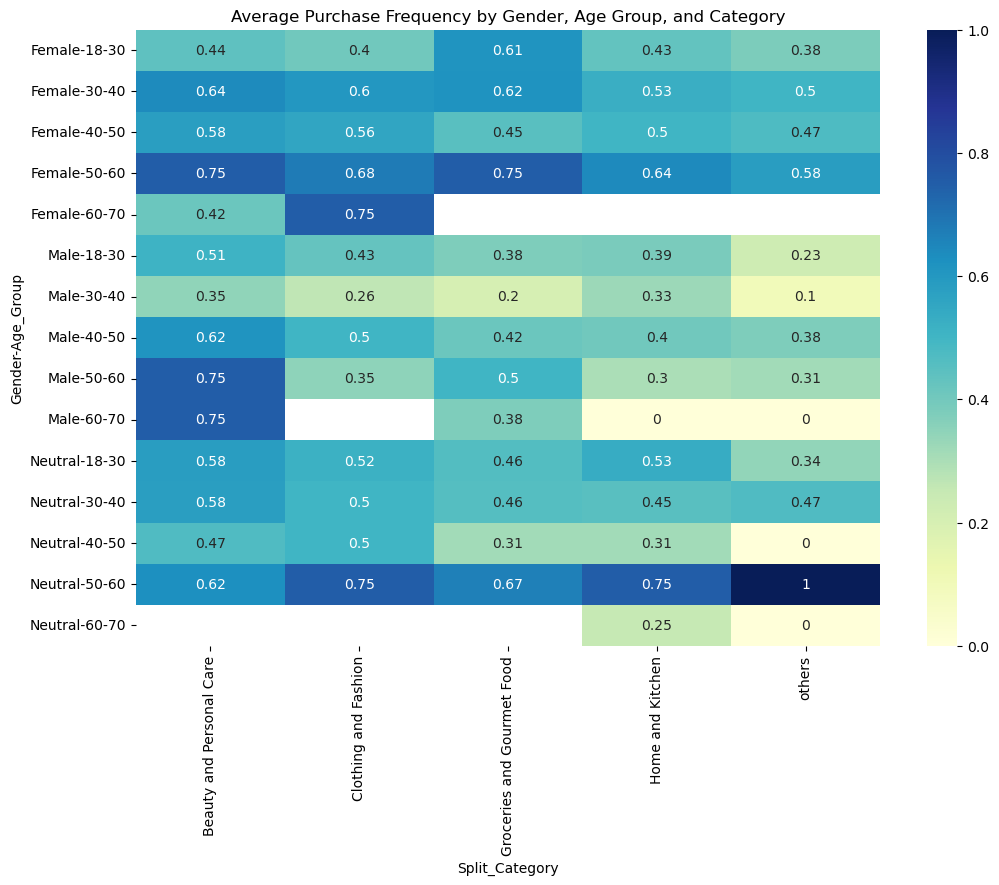

In [7]:
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust bins as needed
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Ensure data_split is updated with the new 'Age_Group'
data_split = data.join(split_categories)  # Assuming split_categories is already defined

# Group by Gender, Age_Group, and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Age_Group', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index=['Gender', 'Age_Group'], columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender, Age Group, and Category')
plt.show()

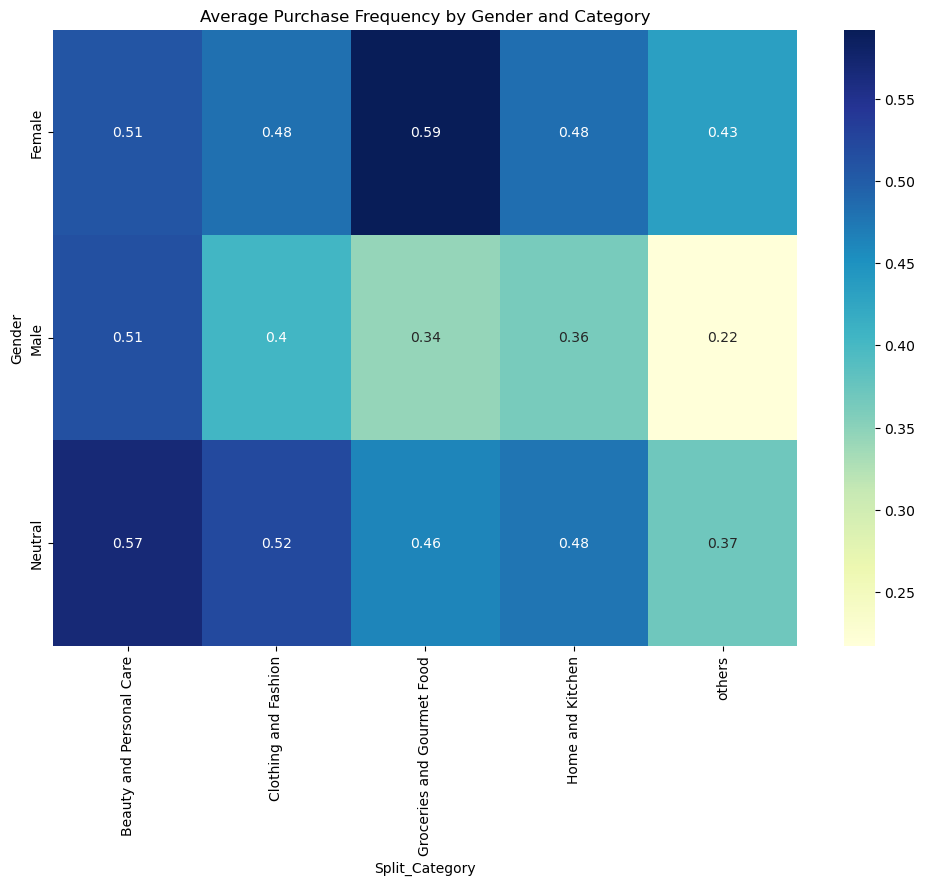

In [8]:
# Assuming 'data' is your DataFrame and 'data_split' has been prepared with 'Split_Category'

# Replace 'others' and 'Prefer not to say' in the Gender column
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Group by Gender and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index='Gender', columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender and Category')
plt.show()